In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn as sk
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
sns.set_color_codes()

%matplotlib inline
%config InlineBackend.figure_format='png'


/home/rrbb/.pyenv/versions/2.7.11/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
import codecs

def read_data(filename):
    with codecs.open(filename, encoding='utf-8', mode='r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]   # header 제외
    return data
train_data = read_data('./ratings_train.txt')
test_data = read_data('./ratings_test.txt')

In [4]:
X = zip(*train_data)[1]
y = zip(*train_data)[2]
y = np.array(y, dtype=int)

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=10000, test_size=10000)
len(X_train), len(X_test)

(10000, 10000)

In [6]:
from konlpy.utils import pprint

In [9]:
pprint((X[0], y[0]))

(아 더빙.. 진짜 짜증나네요 목소리,
 0)


In [12]:
from konlpy.tag import Twitter
pos_tagger = Twitter()

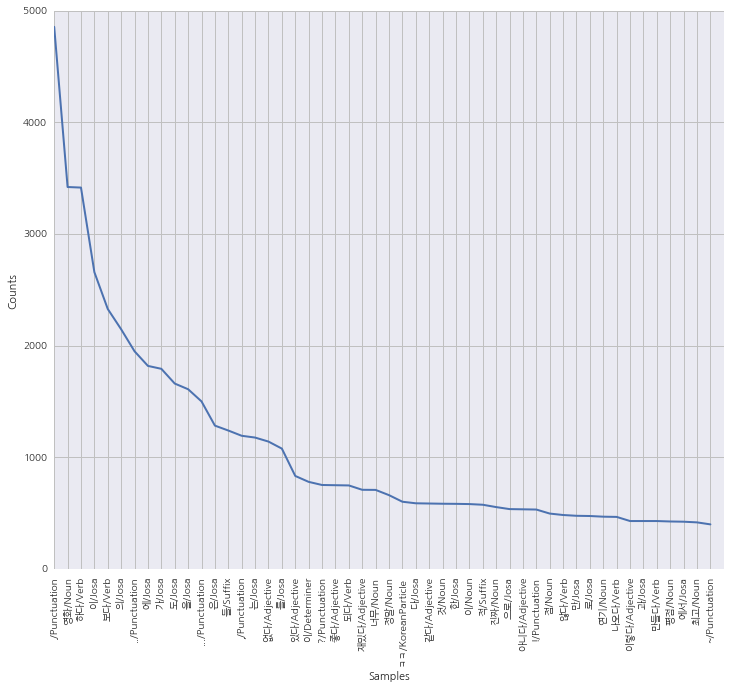

CPU times: user 35.9 s, sys: 1.73 s, total: 37.6 s
Wall time: 31.1 s


In [13]:
%%time


def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

train_docs = [(tokenize(row[1]), row[2]) for row in train_data[:10000]]
tokens = [t for d in train_docs for t in d[0]]
import nltk
text = nltk.Text(tokens, name='NMSC')
mpl.rcParams["font.family"] = "NanumGothic"
plt.figure(figsize=(12,10))
text.plot(50)
plt.show()

In [20]:
aaa =[1,2,3]

0.81649658092772603

In [21]:
N = 100
np.random.seed(0)
X1 = sp.stats.multivariate_normal([0, 0], [[0.7, 0],[0, 0.7]]).rvs(100)
X2 = sp.stats.multivariate_normal([1, 1], [[0.8, 0.2], [0.2, 0.8]]).rvs(100)
X3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]]).rvs(100)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = np.ones(N) * 2
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

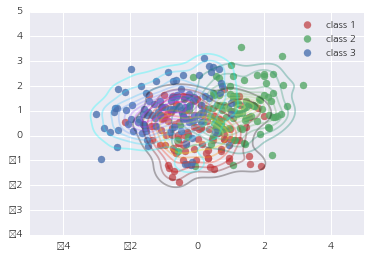

In [22]:
plt.scatter(X1[:,0], X1[:,1], alpha=0.8, s=50, color='r', label="class 1")
plt.scatter(X2[:,0], X2[:,1], alpha=0.8, s=50, color='g', label="class 2")
plt.scatter(X3[:,0], X3[:,1], alpha=0.8, s=50, color='b', label="class 3")
sns.kdeplot(X1[:,0], X1[:,1], alpha=0.3, cmap=mpl.cm.hot)
sns.kdeplot(X2[:,0], X2[:,1], alpha=0.3, cmap=mpl.cm.summer)
sns.kdeplot(X3[:,0], X3[:,1], alpha=0.3, cmap=mpl.cm.cool)
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.legend()
plt.show()



In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariances=True).fit(X,y)

In [25]:
qda.means_

array([[ -8.01254084e-04,   1.19457204e-01],
       [  1.16303727e+00,   1.03930605e+00],
       [ -8.64060404e-01,   1.02295794e+00]])

In [26]:
qda.covariances_[0]

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [27]:
qda.covariances_[1]

array([[ 0.66534246,  0.21132313],
       [ 0.21132313,  0.78806006]])

In [28]:
qda.covariances_[2]

array([[ 0.9351386 ,  0.22880955],
       [ 0.22880955,  0.79142383]])

In [33]:
xmin, xmax = -5, 5
ymin, ymax = -4, 5
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(qda.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()

ZeroDivisionError: division by zero

In [ ]:
# 결과 그림

In [35]:
N = 100
np.random.seed(0)
X1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0],[0, 0.7]]).rvs(100)
X2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2],[0.2, 0.8]]).rvs(100)
X3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2],[0.2, 0.8]]).rvs(100)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2*np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

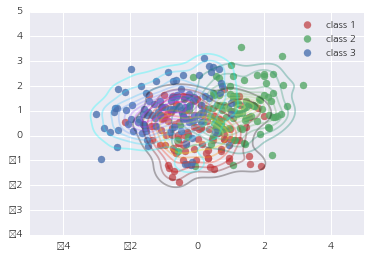

In [36]:
plt.scatter(X1[:,0], X1[:,1], alpha=0.8, s=50, color='r', label="class 1")
plt.scatter(X2[:,0], X2[:,1], alpha=0.8, s=50, color='g', label="class 2")
plt.scatter(X3[:,0], X3[:,1], alpha=0.8, s=50, color='b', label="class 3")
sns.kdeplot(X1[:,0], X1[:,1], alpha=0.3, cmap=mpl.cm.hot)
sns.kdeplot(X2[:,0], X2[:,1], alpha=0.3, cmap=mpl.cm.summer)
sns.kdeplot(X3[:,0], X3[:,1], alpha=0.3, cmap=mpl.cm.cool)
plt.xlim(-5,5)
plt.ylim(-4,5)
plt.legend()
plt.show()

In [37]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariances=True).fit(X, y)

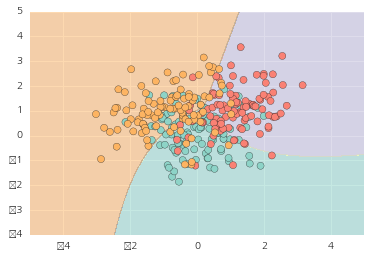

In [56]:
xmin, xmax = -5, 5
ymin, ymax = -4, 5
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000.), np.arange(ymin, ymax, (ymax-ymin)/1000.))
ZZ = np.reshape(qda.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()

In [39]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis().fit(X,y)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y, qda.predict(X)))
confusion_matrix()

             precision    recall  f1-score   support

        0.0       0.63      0.63      0.63       100
        1.0       0.78      0.77      0.77       100
        2.0       0.74      0.75      0.75       100

avg / total       0.72      0.72      0.72       300



TypeError: confusion_matrix() takes at least 2 arguments (0 given)

In [46]:
a = [1,2,3]
aa = lambda x,y : x+y

In [58]:
import pydot
import StringIO
from IPython.core.display import Image

def drawtree(command):
    graph = pydot.graph_from_dot_data(command)
    image = graph.create_png()
    image_buf = StringIO.StringIO()
    image_buf.write(image)
    return Image(image_buf.getvalue())